In [85]:
# 191137127_Sabeer-Saeed_Software-Engineering
# This the classification linear discreminant analysis using Diabetes data sets
# The is showing how LDA classification is more suitable for Diabetes
# loading the initials of the program 
# This Python 3 environment comes with many helpful analytics libraries installed
# As dataset is loaded into a pandas data frame object, the first step is to divide dataset into features 
# and corresponding labels and then divide the resultant dataset into training and test sets. 
# The following code divides data into labels and feature set:
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import random
#matplotlib inline


In [86]:
data =pd.read_csv("diabetes.csv")
# to get the datasets from current directory where they are saved


In [87]:
print(data)# to print those that are positive and negative for the datases

     preg  plas  pres  skin  insu  mass   pedi  age            class
0       6   148    72    35     0  33.6  0.627   50  tested_positive
1       1    85    66    29     0  26.6  0.351   31  tested_negative
2       8   183    64     0     0  23.3  0.672   32  tested_positive
3       1    89    66    23    94  28.1  0.167   21  tested_negative
4       0   137    40    35   168  43.1  2.288   33  tested_positive
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
763    10   101    76    48   180  32.9  0.171   63  tested_negative
764     2   122    70    27     0  36.8  0.340   27  tested_negative
765     5   121    72    23   112  26.2  0.245   30  tested_negative
766     1   126    60     0     0  30.1  0.349   47  tested_positive
767     1    93    70    31     0  30.4  0.315   23  tested_negative

[768 rows x 9 columns]


In [88]:
#CREATING and exporting A DATAFRAME FOR THE MAIN FILE TO BE USED IN THE CODE
#It will be use here display the shape of the datasets
main_file=pd.read_csv('diabetes.csv')
main_file.shape

(768, 9)

In [89]:
main_file.describe()# for describing the data sets of diabetes, so here is description of the datasets

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [90]:
main_file.head()# aslo for sub describing the data sets

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [91]:
#COUNTING THE PEOPLE base on class of who has the diabetes or not that is tested_positive or tested_negetive
main_file.groupby("class").size()

class
tested_negative    500
tested_positive    268
dtype: int64

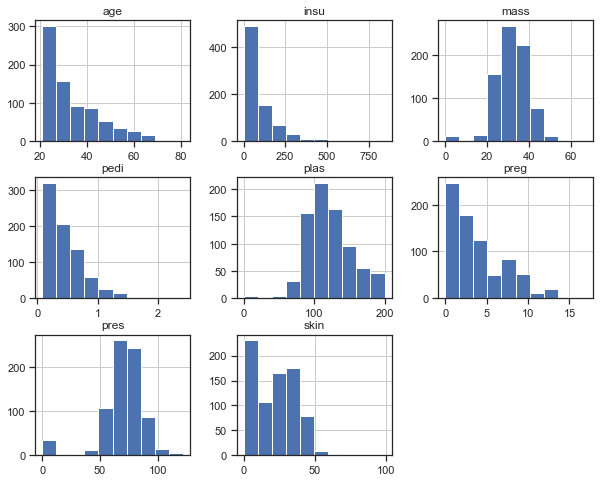

<Figure size 432x288 with 0 Axes>

In [92]:
main_file.hist(figsize=(10,8)) #Viewing the datasets in form of Diagram/Graph
plt.figure()
plt.show()

preg       AxesSubplot(0.125,0.657941;0.227941x0.222059)
plas    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
pres    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
skin       AxesSubplot(0.125,0.391471;0.227941x0.222059)
insu    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
mass    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
pedi          AxesSubplot(0.125,0.125;0.227941x0.222059)
age        AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

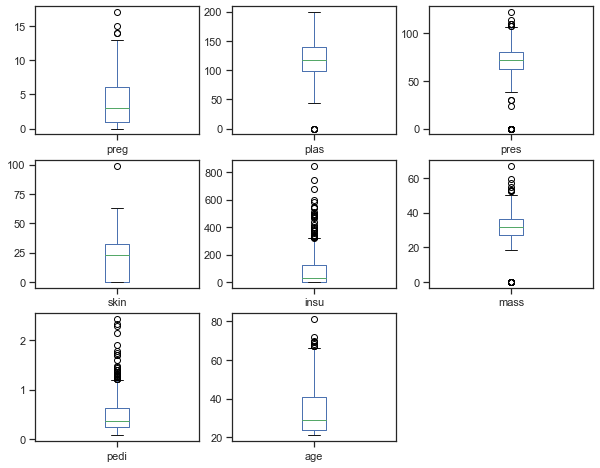

In [93]:
%matplotlib inline
main_file.plot(kind= 'box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))
#This below display the parameter and elements of the datasets

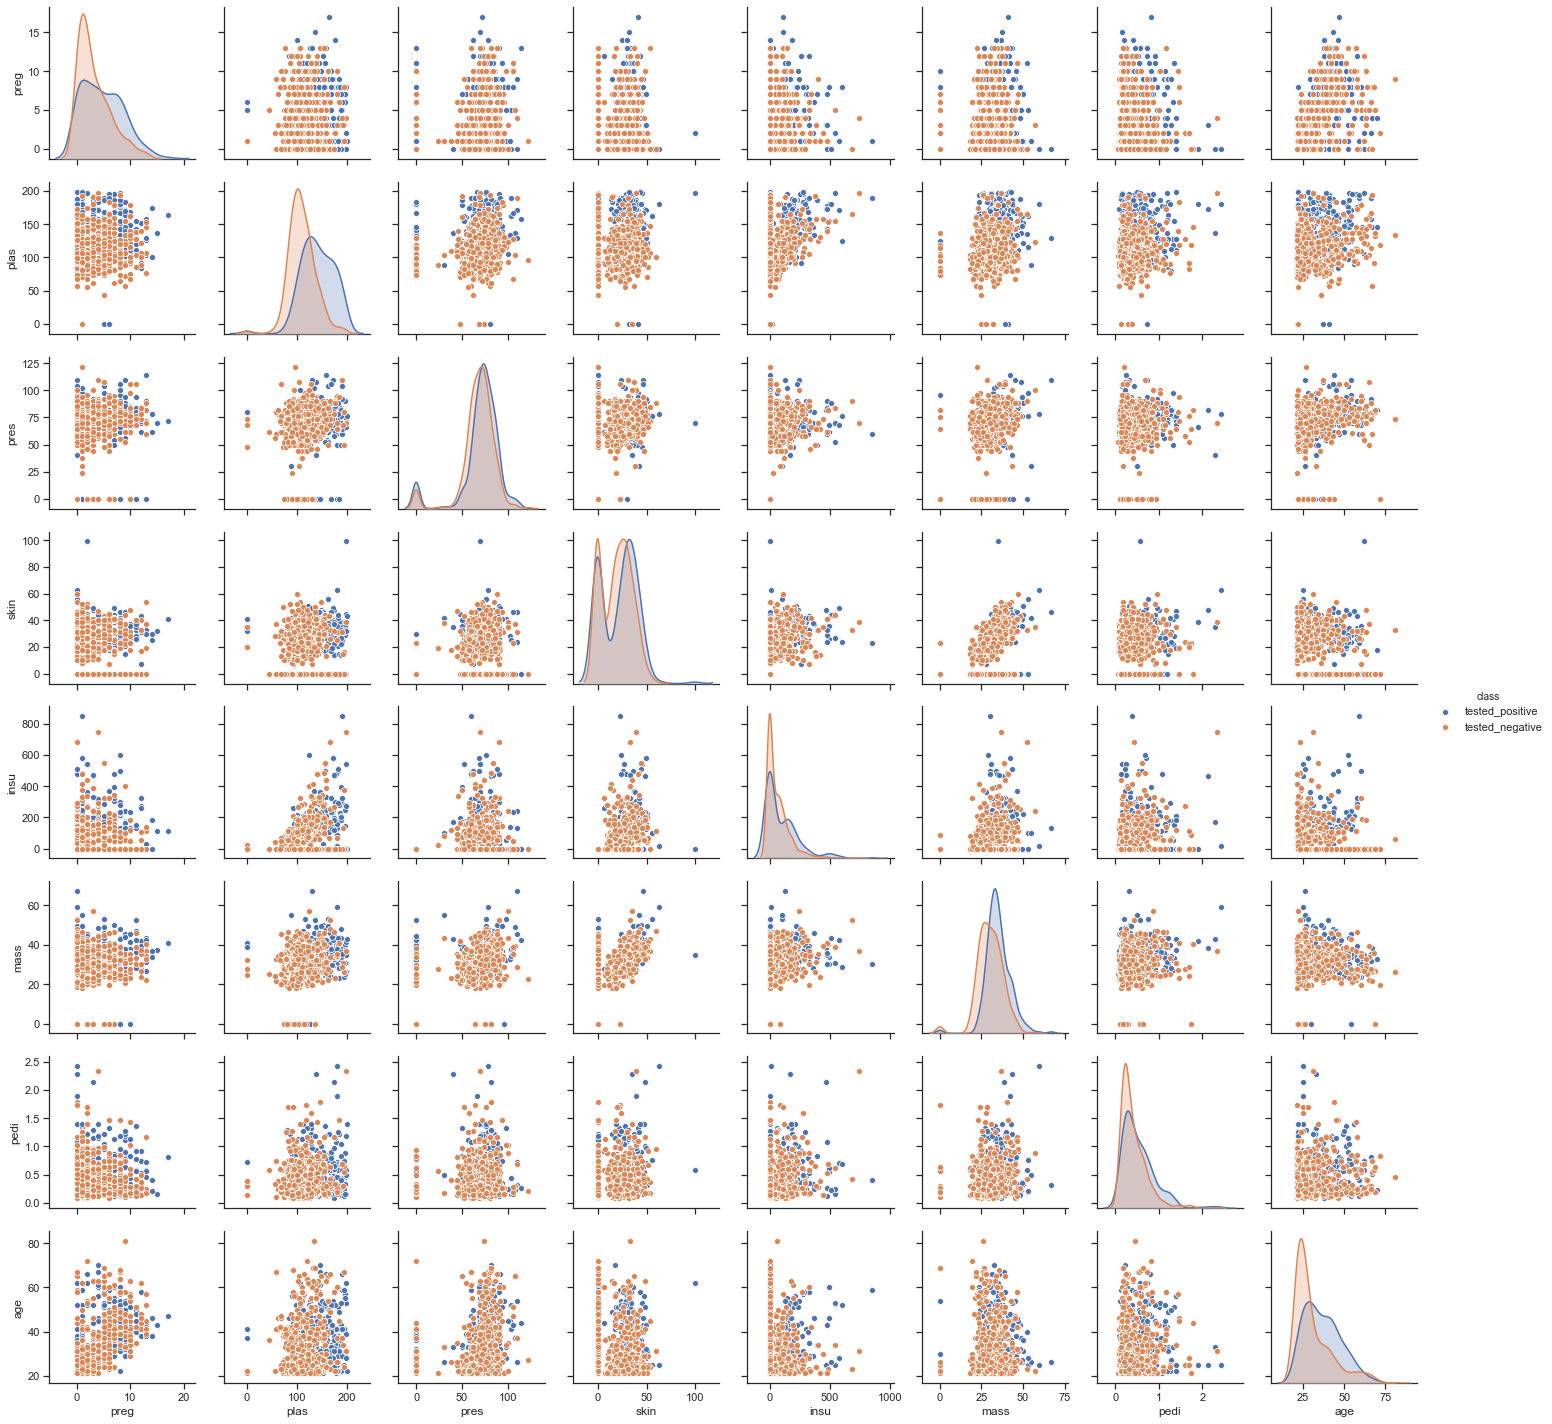

In [94]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(main_file, hue="class")
#This is for graphical analysis

In [67]:
#Separating the data into Train & Test (80/20 split)
X = main_file.ix[:,0:8]
Y = main_file["class"]
from sklearn import model_selection
X_train, X_test, Y_train, Y_test= model_selection.train_test_split(X, Y, test_size=0.2) #the o.2 means (80/20)

C:\Users\Sabmankovic\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Sabmankovic\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [70]:
len(X_train)

614

In [71]:
len(X_test)

154

In [72]:
len(Y_train)

614

In [73]:
len(Y_test)

154

In [76]:
#Here is to compare the LDA with the following other classifications
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naives Bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.svm import SVC #Support Vector
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis# The LDA
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier


models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Naives Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC()))
#the following above will display the attribute and score interms of Diabetes data sets

In [95]:
#This is the model that will evaluate and examine the various classification by displaying the result accuracy
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    kfold = model_selection.KFold(n_splits=10)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()) #The warning message can be ignores, but below is the results score

C:\Users\Sabmankovic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sabmankovic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sabmankovic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sabmankovic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sabmankovic\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Logistic Regression 0.773453199365415
Linear Discriminant Analysis 0.7637228979375992
KNN 0.7180592279217344
Decision Tree 0.7167636171337917
Random Forest 0.7443945002644103
Naives Bayes 0.7525383395029085
Support Vector Machine 0.6399788471708092


[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'Linear Discriminant Analysis'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Naives Bayes'),
 Text(0, 0, 'Support Vector Machine')]

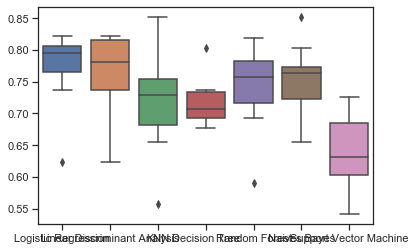

In [96]:
#Above is the results of the various classification methods
#Visualizing the different model accuracies using a box plot
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

In [97]:
#FITTING THE LDA MODEL ON THE TEST DATASET
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
predictions_lda = lda.predict(X_test)

In [98]:
from sklearn.metrics import classification_report #To display the Classification report in fiqure
from sklearn.metrics import confusion_matrix #Confusion matrix analysis
from sklearn.metrics import accuracy_score #Display the accuracy score

In [99]:
print("Accuracy Score is:") #to print the accuracy sentence
print(accuracy_score(Y_test, predictions_lda)) #To display the accuracy score
print()
#Below is the Accuracy which shows that LDA Classification is best of Diabetes analysis

Accuracy Score is:
0.7727272727272727



In [100]:
print("Classification Report:")
print(classification_report(Y_test, predictions_lda))

Classification Report:
                 precision    recall  f1-score   support

tested_negative       0.80      0.90      0.85       107
tested_positive       0.68      0.49      0.57        47

       accuracy                           0.77       154
      macro avg       0.74      0.69      0.71       154
   weighted avg       0.76      0.77      0.76       154



In [101]:
#let Creat a Confusion Matrix also to analyse is
conf = confusion_matrix(Y_test,predictions_lda)
conf

array([[96, 11],
       [24, 23]], dtype=int64)

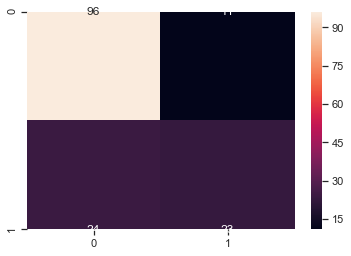

In [102]:
label = ["0","1"] #horizontal and vertical 
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label) #to label the shape

In [103]:
# The conlution is that LDA tries to reduce dimensions of the feature set also retaining the information
# that discriminates output classes which makes LDA with high 0.7727272727272727 suitable for Diabetes analysis
# LDA tries to find a decision boundary around each cluster of a class.
# It then projects the data points to new dimensions in a way that the clusters are as separate from each other as flexible 
# and the individual elements within a cluster are as close to the centroid of the cluster as possible. The new dimensions 
# are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between 
# the data points within a cluster and their centroids. 
# These new dimensions form the linear discriminants of the feature set.